In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [13]:
iris =  datasets.load_iris() 
X = iris.data
print(X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [14]:
def centroids (k):
    c={}
    t=0
    while True:
        ri=np.random.choice(range(len(X)), k)
        #print(ri)
        if len(set(ri))==k:
            for i in range(k):
                c[i]=X[ri[i]]
            break

    return c

In [15]:
k = 4
c=centroids(k)
print(c)

{0: array([4.4, 2.9, 1.4, 0.2]), 1: array([7.7, 2.8, 6.7, 2. ]), 2: array([6. , 3.4, 4.5, 1.6]), 3: array([5.5, 2.5, 4. , 1.3])}


In [16]:
def e_dist(x1, x2):
    return np.linalg.norm(x1-x2)

In [17]:
def KM(X,k,c):
    ep=100
    old_c={}
    for i in range(ep):
        cls={}
        for ik,iv in c.items():
            cls[ik]=[]

        #print('centroids: ',c)
        for x in X:
            dis=[e_dist(x,v) for k,v in c.items() ]
            ct=dis.index( min(dis) )
            cls[ct].append(x)

        for ik in range(k):
            old_c[ik]=c[ik].copy()
        nc={}
        for ik in range(k):
            avg_c=np.array(cls[ik]).mean(axis=0)
            nc[ik]=avg_c
            c[ik]=avg_c
        nupdate=0
        for ik in range(k):
            if e_dist( c[ik], old_c[ik] ) > 0:
                nupdate+=1
        if nupdate==0:
            break
    return c,cls

In [18]:
se=[]
ks=[]
for i in range(1,10):
    c=centroids(i)
    c,cls=KM(X,i,c)
    sse=0
    for cluster,centroid in zip(cls.values() ,c.values()):
        for x in cluster:
            d=e_dist(x, centroid)
            sse+=d*d
    print('sse=',sse)
    se.append(sse)
    ks.append(i)

sse= 681.3706000000001
sse= 152.34795176035803
sse= 78.85144142614604
sse= 57.38387326549492
sse= 46.461172672672696
sse= 39.6203750142809
sse= 38.207138528138536
sse= 46.464798000610514
sse= 29.064527629233535


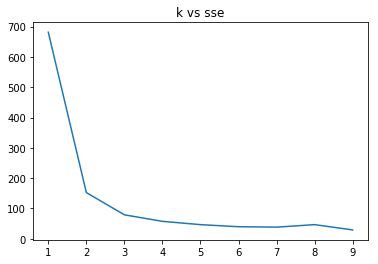

In [19]:
plt.plot(ks, se)
plt.title('k vs sse')
plt.show()

In [20]:
mx=0
for i in range(1,9):
    d=se[i-1]-se[i]
    if d>mx:
        mx=d
        best_k=i+1
print(best_k)

2


In [23]:
c=centroids(best_k)
fc,cls=KM(X,best_k,c)
print(fc)

{0: array([5.00566038, 3.36981132, 1.56037736, 0.29056604]), 1: array([6.30103093, 2.88659794, 4.95876289, 1.69587629])}
